# Exploratory Data Analysis

There are the main conclusions from the performed EDA.

- Most correlated feature to MPG is Weight. This correlation is non-linear.
- Some features like Weight, Horsepower and Displacement show a high colinearity. We need to watch out for these features if we are using an algorithm that can suffer from features colinearity.
- Depending on the algorithms, we may need to scale features.
- We will need one-hot-encoding for the categorical feature Region.
- We choose the Root Mean Squared Error (RMSE) as a performance metric to evaluate models.
- We establishe a baseline performance test using `mpg` mean value from the training set to predict `mpg` in the test set. The RMSE of this dummy model is 7.347 MPG.


#### Get cleaned data 

In [2]:
import sys
sys.path.insert(0,'/Users/Armin/Desktop/MyFirstMLOps/auto-mpg/')

In [3]:
import pandas as pd
from src.clean import clean_dataset

df = clean_dataset()
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,name,company,region
0,18.0,8,307.0,130.0,3504.0,12.0,70,Chevrolet Chevelle Malibu,Chevrolet,USA
1,15.0,8,350.0,165.0,3693.0,11.5,70,Buick Skylark 320,Buick,USA
2,18.0,8,318.0,150.0,3436.0,11.0,70,Plymouth Satellite,Plymouth,USA
3,16.0,8,304.0,150.0,3433.0,12.0,70,Amc Rebel Sst,AMC,USA
4,17.0,8,302.0,140.0,3449.0,10.5,70,Ford Torino,Ford,USA


#### Data types and missing values 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   year          398 non-null    int64  
 7   name          398 non-null    object 
 8   company       398 non-null    object 
 9   region        398 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 31.2+ KB


#### Split into training and test sets 
Exploratory Data Analysis should be exclusively conducted on the training set to avoid "data peaking": making assumptions about the test set. 

The test set should be left to the very end of the modelling process to assess assumptions on unseen data.

Stratified Sampling — We create homogeneous subgroups called strata from the overall population and sample the right number of instances to each stratum to ensure that the test set is representative of the overall population.

In [5]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(df, df["cylinders"]):
    df_train = df.loc[train_index]
    df_test = df.loc[test_index]

In [5]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, test_size=0.2, random_state=42, shuffle=True)

<IPython.core.display.Javascript object>

In [6]:
# pickle data for next steps
df_train.to_pickle("../data/interim/train_cleaned.csv")
df_test.to_pickle("../data/interim/test_cleaned.csv")

#### Imports for visulization 

In [7]:
import matplotlib.pyplot as plt

plt.style.use("classic")
# plt.rcParams["font.size"] = 24
%matplotlib inline

import seaborn as sns

sns.set_style("whitegrid")
# sns.set(font_scale=2)

# Internal ipython tool for setting figure size
from IPython.core.pylabtools import figsize

## Visualize target variabel `mpg` 

/Users/Armin/opt/miniconda3/envs/MLOps/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


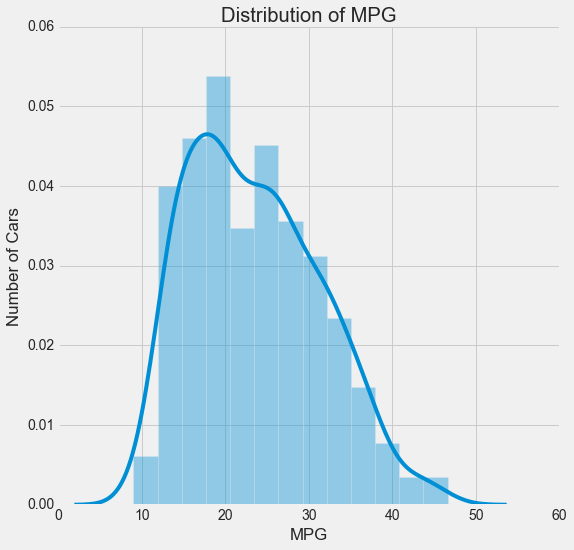

In [8]:
figsize(8, 8)
plt.style.use("fivethirtyeight")
sns.distplot(df["mpg"])
plt.xlabel("MPG")
plt.ylabel("Number of Cars")
plt.title("Distribution of MPG")
sns.despine()

Mile per gallon variable is close to normally distributed (bell-shaped).

#### Outliers 

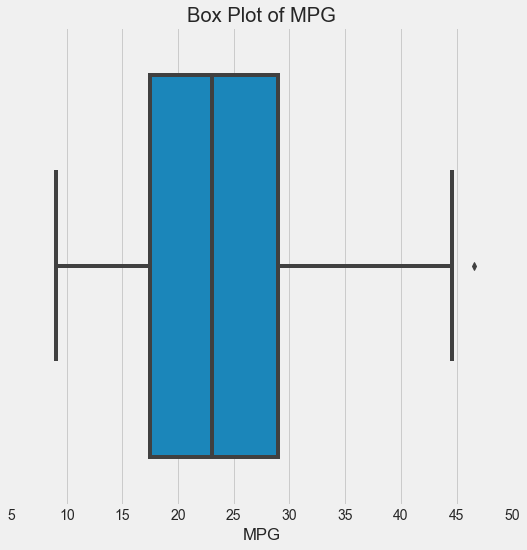

<IPython.core.display.Javascript object>

In [8]:
sns.boxplot(df["mpg"])
plt.xlabel("MPG")
plt.title("Box Plot of MPG")
plt.show()

In [9]:
df.sort_values(by="mpg").tail(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,name,company,region
247,39.4,4,85.0,70.0,2070.0,18.6,78,Datsun B210 Gx,Datsun,ASIA
324,40.8,4,85.0,65.0,2110.0,19.2,80,Datsun 210,Datsun,ASIA
330,40.9,4,85.0,NaN,1835.0,17.3,80,Renault Lecar Deluxe,Renault,EUROPE
309,41.5,4,98.0,76.0,2144.0,14.7,80,Vw Rabbit,Volkswagen,EUROPE
244,43.1,4,90.0,48.0,1985.0,21.5,78,Volkswagen Rabbit Custom Diesel,Volkswagen,EUROPE
326,43.4,4,90.0,48.0,2335.0,23.7,80,Vw Dasher (Diesel),Volkswagen,EUROPE
394,44.0,4,97.0,52.0,2130.0,24.6,82,Vw Pickup,Volkswagen,EUROPE
325,44.3,4,90.0,48.0,2085.0,21.7,80,Vw Rabbit C (Diesel),Volkswagen,EUROPE
329,44.6,4,91.0,67.0,1850.0,13.8,80,Honda Civic 1500 Gl,Honda,ASIA
322,46.6,4,86.0,65.0,2110.0,17.9,80,Mazda Glc,Mazda,ASIA


The outlier is the 1980 Mazda Glc. This car has been marketed for its high fuel economy. We can can find models of the same car with 50 MPG [here](https://www.aboutautomobile.com/Fuel-Economy/1980/Mazda/GLC). 

## Summay statistics

In [10]:
# summary of coutinous features
cont_variables = ["mpg", "displacement", "horsepower", "weight", "acceleration"]
df_train[cont_variables].describe().round().transpose()

,count,mean,std,min,25%,50%,75%,max
mpg,318.0,23.0,8.0,9.0,18.0,22.0,29.0,47.0
displacement,318.0,192.0,102.0,68.0,105.0,146.0,262.0,455.0
horsepower,314.0,104.0,37.0,46.0,75.0,92.0,125.0,230.0
weight,318.0,2977.0,832.0,1755.0,2237.0,2844.0,3597.0,5140.0
acceleration,318.0,16.0,3.0,8.0,14.0,16.0,17.0,25.0


In [11]:
# summary of object features
df.describe(include=["O"])

,name,company,region
count,398,398,398
unique,305,30,3
top,Ford Pinto,Ford,USA
freq,6,51,249


## Distribution of continuous features 

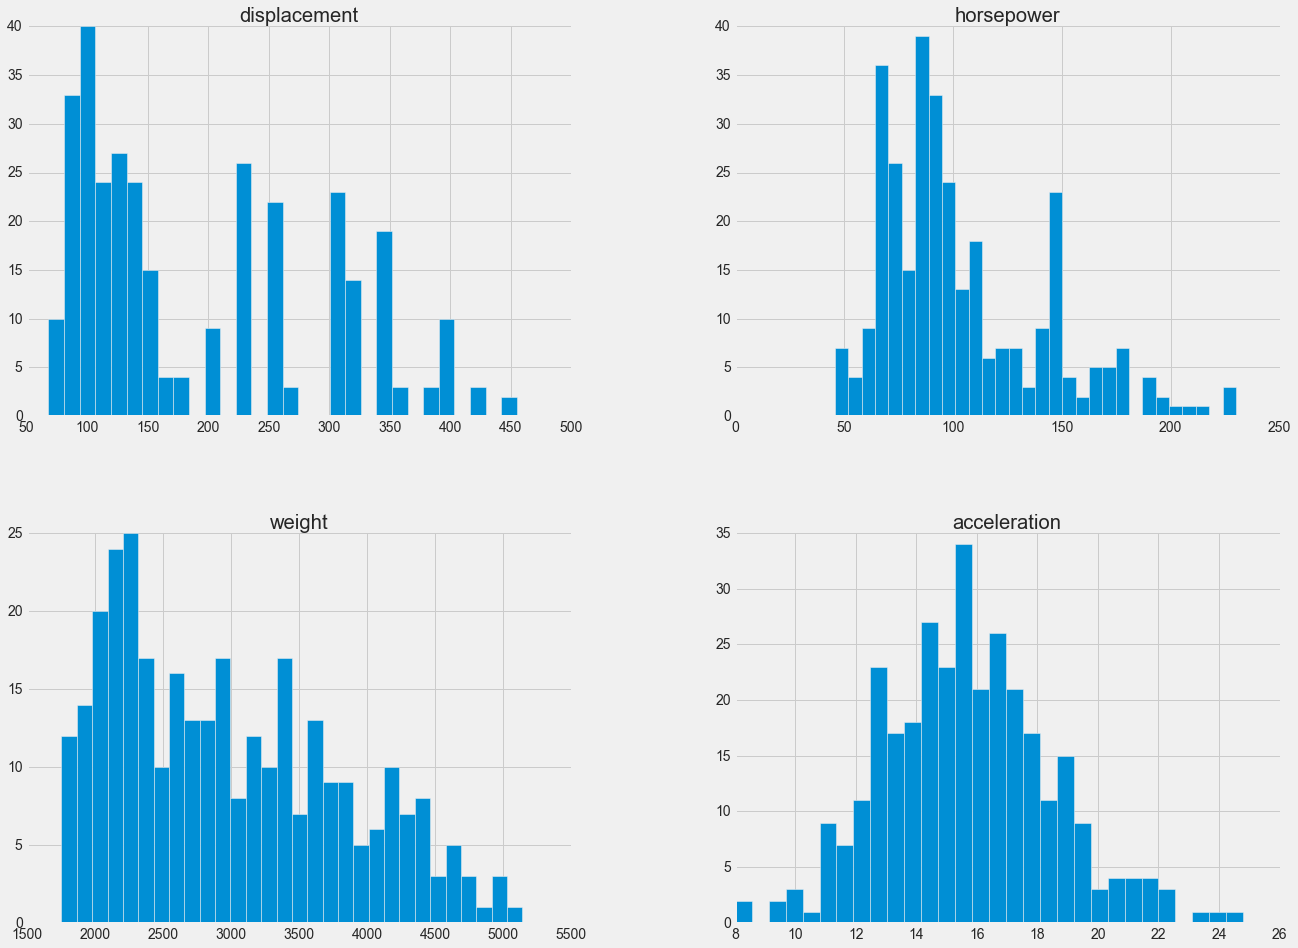

In [12]:
cont_features = ["displacement", "horsepower", "weight", "acceleration"]
df_train[cont_features].hist(bins=30, figsize=(20, 15))
sns.despine()

- Some histograms are tail heavy which can make it harder for some Machine Learning algorithms to detect patterns. It can be usefull to transform these features to make them more normally distributed.
- Continuous features are distributed on the same scale.
- However, the scale differs from the multi-valued discrete feature `cylinders` (3-8).
Depending on the algorithm, further scaling might be needed.

Horsepower is skewed to the left. It's better to use median strategy to impute the missing values.

## Distribution of categorical features

### Region

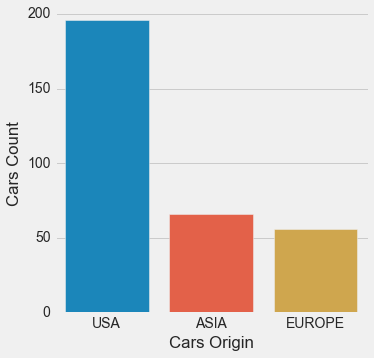

<IPython.core.display.Javascript object>

In [13]:
figsize(5, 5)
sns.countplot(df_train.region)
plt.ylabel("Cars Count")
plt.xlabel("Cars Origin")
sns.despine()

### Year

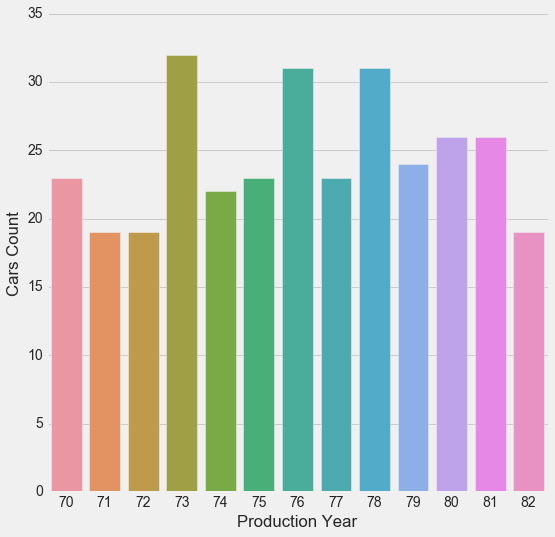

<IPython.core.display.Javascript object>

In [14]:
figsize(8, 8)
sns.countplot(df_train.year)
plt.ylabel("Cars Count")
plt.xlabel("Production Year")
sns.despine()

### Cylinders 

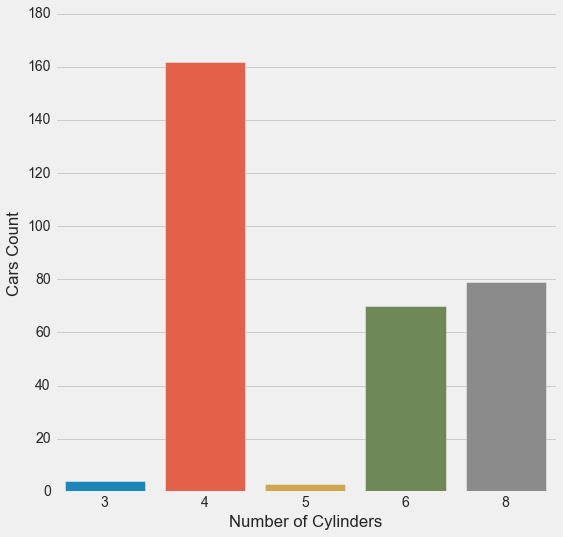

<IPython.core.display.Javascript object>

In [15]:
figsize(8, 8)
sns.countplot(df_train.cylinders)
plt.xlabel("Number of Cylinders")
plt.ylabel("Cars Count")
sns.despine()

We can check on wikipedia if it is correct that some cylinders with 3 or 5 cylinders really exists.

We can see how important this feature is important to predict `mpg`. If it has a high importance we will come back to it to investigate it further.

## Look at extreme values

In [14]:
# get instances from the data frame having min and max values for specified column
def get_extreme(df, column):
    extremes = [df[column].min(), df[column].max()]
    return df[df[column].isin(extremes)].sort_values(by=column)

### Cars with lowest and highest mpg 

In [15]:
get_extreme(df_train, "mpg")

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,name,company,region
28,9.0,8,304.0,193.0,4732.0,18.5,70,Hi 1200D,Hi,USA
322,46.6,4,86.0,65.0,2110.0,17.9,80,Mazda Glc,Mazda,ASIA


Intuitively these extreme instances make sense. The car with the highest mpg (Hi 1200D) is 10 years older than the one with the lowest mpg (Mazda Glc). It's also twice as heavy, has double the number of cylinders, and tree times more horsepower. We also expected that cars from the USA have lower mpg than cars from ASIA. 

### Cars with lowest and highest horsepower

In [16]:
get_extreme(df_train, "horsepower")

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,name,company,region
102,26.0,4,97.0,46.0,1950.0,21.0,73,Volkswagen Super Beetle,Volkswagen,EUROPE
19,26.0,4,97.0,46.0,1835.0,20.5,70,Volkswagen 1131 Deluxe Sedan,Volkswagen,EUROPE
116,16.0,8,400.0,230.0,4278.0,9.5,73,Pontiac Grand Prix,Pontiac,USA


### Cars with lowest and highest weight

In [17]:
get_extreme(df_train, "weight")

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,name,company,region
343,39.1,4,79.0,58.0,1755.0,16.9,81,Toyota Starlet,Toyota,ASIA
44,13.0,8,400.0,175.0,5140.0,12.0,71,Pontiac Safari (Sw),Pontiac,USA


### Cars with lowest and heighest displacement

In [18]:
get_extreme(df_train, "displacement")

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,name,company,region
117,29.0,4,68.0,49.0,1867.0,19.5,73,Fiat 128,Fiat,EUROPE
95,12.0,8,455.0,225.0,4951.0,11.0,73,Buick Electra 225 Custom,Buick,USA
8,14.0,8,455.0,225.0,4425.0,10.0,70,Pontiac Catalina,Pontiac,USA


## Look for relationships 

In [19]:
corr_matrix = df_train.corr()
corr_matrix["mpg"].sort_values(ascending=True)

weight         -0.822723
displacement   -0.800063
horsepower     -0.777978
cylinders      -0.765693
acceleration    0.411989
year            0.577636
mpg             1.000000
Name: mpg, dtype: float64

We can see strong negative and positive correlations between features and the target. These correlations make sense intuitively. The bigger the car, the bigger the engine, the bigger the horsepower -> the lower the mpg. 

On the other side, the more recent the car -> the highest the mpg.

#### Visualize weight, displacement, horsepower VS mpg 

/Users/Armin/opt/miniconda3/envs/MLOps/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


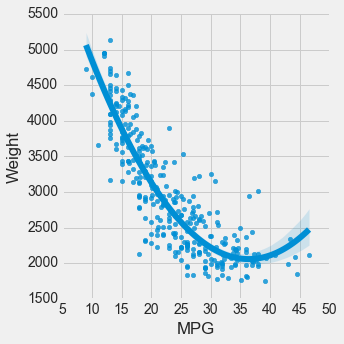

In [20]:
sns.lmplot("mpg", "weight", df_train, order=2)
plt.xlabel("MPG")
plt.ylabel("Weight")
sns.despine()

/Users/Armin/opt/miniconda3/envs/MLOps/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


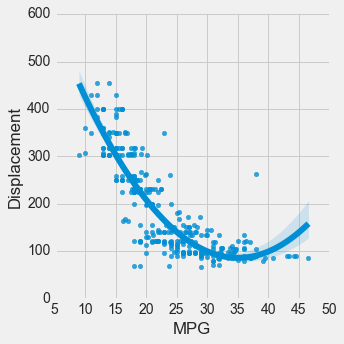

In [21]:
sns.lmplot("mpg", "displacement", df_train, order=2)
plt.xlabel("MPG")
plt.ylabel("Displacement")
sns.despine()

/Users/Armin/opt/miniconda3/envs/MLOps/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


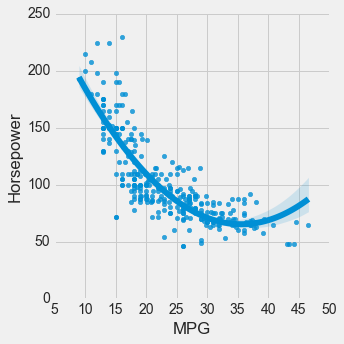

In [22]:
sns.lmplot("mpg", "horsepower", df_train, order=2)
plt.xlabel("MPG")
plt.ylabel("Horsepower")
sns.despine()

The banana shaped data shows a clear non-linaer relationship between each of the features `horsepower`, `displacement`, `weight`, and `mpg`. The plots show a non-linear increase of `mpg`  for increasing vehicule weight, displacement or horsepower.

#### Visualize accelaration and year VS mpg 

/Users/Armin/opt/miniconda3/envs/MLOps/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


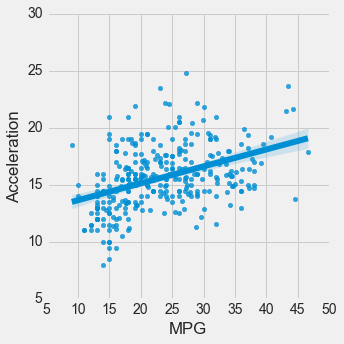

In [23]:
sns.lmplot("mpg", "acceleration", df_train, order=1)
plt.xlabel("MPG")
plt.ylabel("Acceleration")
sns.despine()

/Users/Armin/opt/miniconda3/envs/MLOps/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


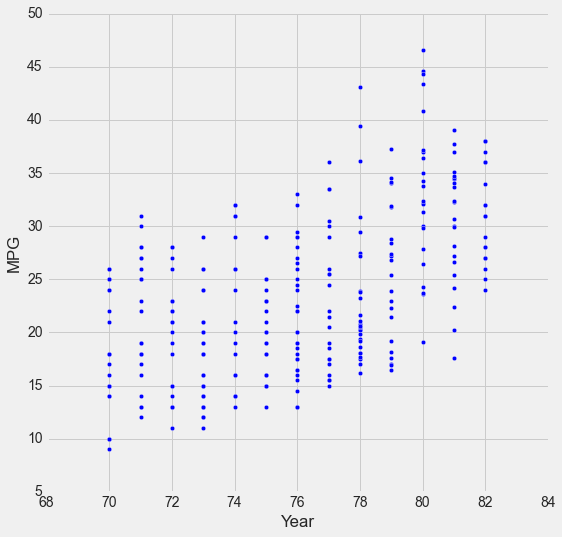

In [24]:
sns.scatterplot(df_train["year"], df_train["mpg"])
plt.xlabel("Year")
plt.ylabel("MPG")
sns.despine()

The plots show that a relationship exist between the input features `acceleration` and `year` and the target `mog`. `mpg` seams to incrase linearly with these feature.

#### Visualize cylinders  and  region VS mpg

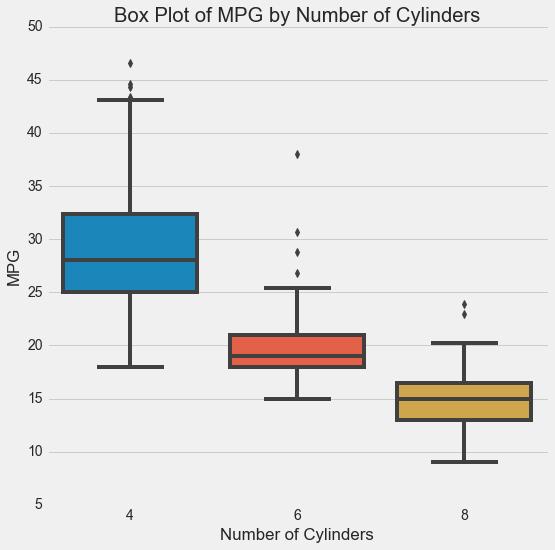

In [25]:
df_cylinders = df_train[~df_train["cylinders"].isin([3, 5])]
sns.boxplot(x="cylinders", y="mpg", data=df_cylinders)
plt.xlabel("Number of Cylinders")
plt.ylabel("MPG")
plt.title("Box Plot of MPG by Number of Cylinders")
sns.despine()

/Users/Armin/opt/miniconda3/envs/MLOps/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/Armin/opt/miniconda3/envs/MLOps/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/Armin/opt/miniconda3/envs/MLOps/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a fi

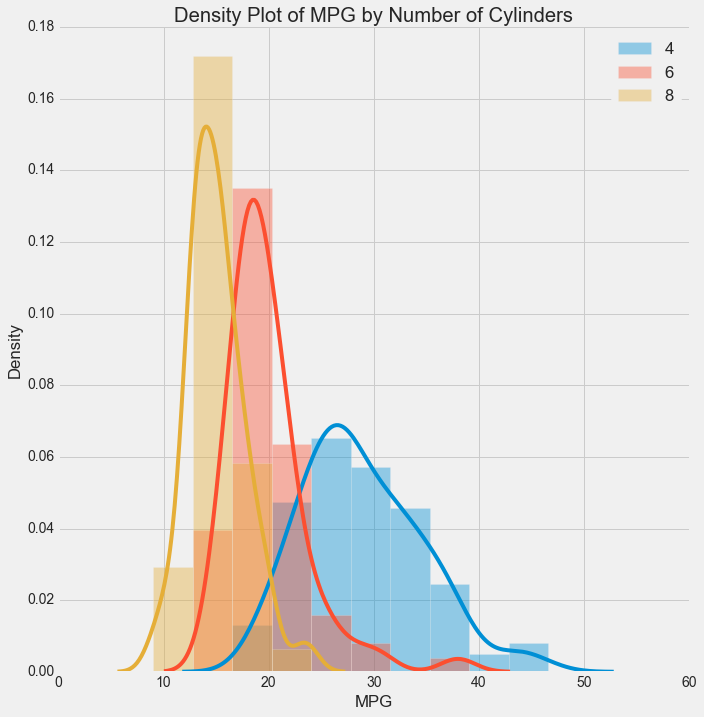

In [26]:
import numpy as np

_, bins = np.histogram(df_cylinders["mpg"])
g = sns.FacetGrid(df_cylinders, hue="cylinders", height=10)
g = g.map(sns.distplot, "mpg", bins=bins)
plt.ylabel("Density")
plt.xlabel("MPG")
plt.title("Density Plot of MPG by Number of Cylinders")
plt.legend()
plt.show()

The plots show that a relationship exist between the input features `acceleration` and `year` and the target `mog`. `mpg` seams to incrase linearly with these feature. 

/Users/Armin/opt/miniconda3/envs/MLOps/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/Armin/opt/miniconda3/envs/MLOps/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/Armin/opt/miniconda3/envs/MLOps/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a fi

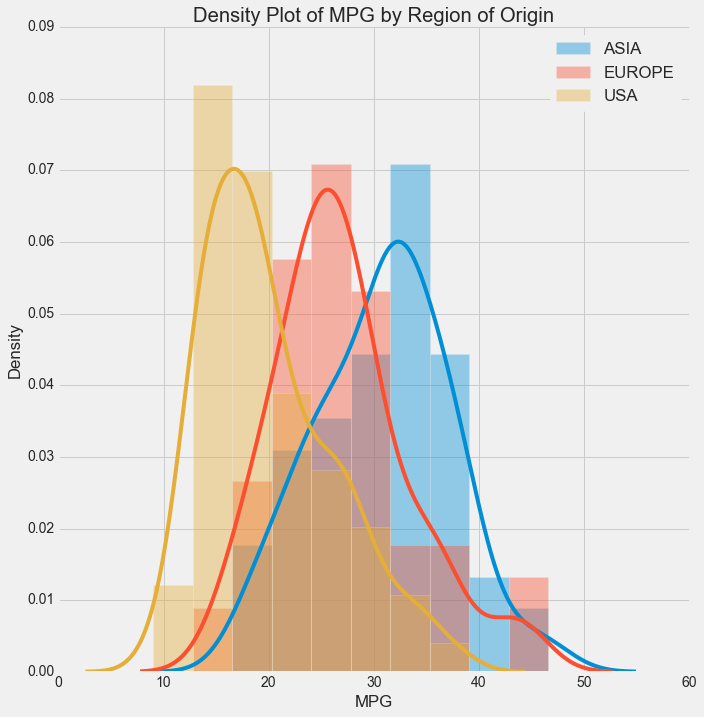

In [27]:
_, bins = np.histogram(df_train["mpg"])
g = sns.FacetGrid(df_train, hue="region", height=10)
g = g.map(sns.distplot, "mpg", bins=bins)
plt.ylabel("Density")
plt.xlabel("MPG")
plt.title("Density Plot of MPG by Region of Origin")
plt.legend()
plt.show()

The desity plot shows that a car made in Asia has a higher `mgp` then a car made in Europe on average. A car made in Europe has a higher `mpg` that a car made in USA on avergae.

### Check features collinearity

#### Pair plots 

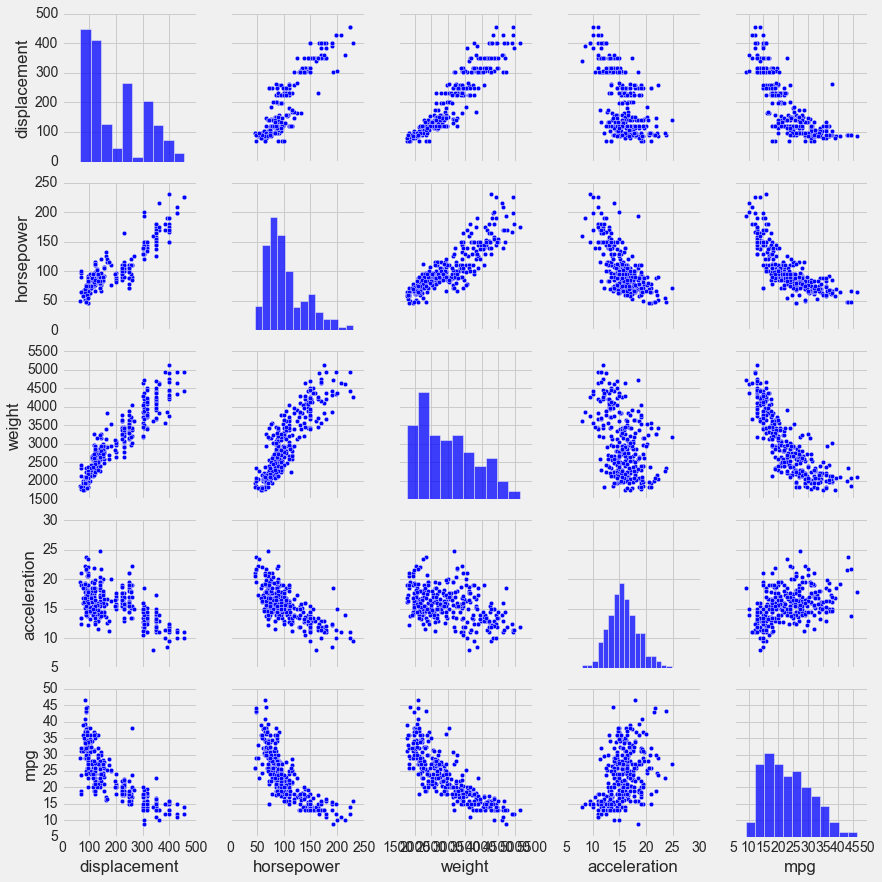

In [28]:
continous = ["displacement", "horsepower", "weight", "acceleration", "mpg"]

sns.pairplot(df_train[continous].dropna())
plt.show()

#### Pearson scores of correlation 

In [29]:
df_train[continous].corr()

,displacement,horsepower,weight,acceleration,mpg
displacement,1.000000,0.894506,0.934039,-0.545550,-0.800063
horsepower,0.894506,1.000000,0.868050,-0.682743,-0.777978
weight,0.934039,0.868050,1.000000,-0.410535,-0.822723
acceleration,-0.545550,-0.682743,-0.410535,1.000000,0.411989
mpg,-0.800063,-0.777978,-0.822723,0.411989,1.000000


`cylinders`, `displacement` and `weight` are highly correlated.

`mpg` is highly correlated to these tree features as well.

We can experiment with features selection:
- Keep features that improves predictions
- Use Lasso Regression 
- Use feature importance given by random forest
- Use PCA

However, we will wait until the modeling step. Feature Selection should be done iteratively in combination with training models.

## Performance metric : Root Mean Squared Error

In line with [Andrew Ng recommendation](https://www.coursera.org/learn/machine-learning-projects), we will use a unique metric to evaluate algorithms and models performance.

For this regression problem, we will use Root Mean Squared Error (RMSE). RMSE indicates how much error typically makes in its predictions, with a height weight for large errors and is generally preferred for regression problems according to [Aurelien Geron](https://github.com/ageron/handson-ml2).

Morover, `mpg` is bell-shaped and we detected the presence of only one outlier. RMSE will not suffer from the presence of outliers. 


## Baseline regression model 

As a baseline model for this regression task, we will use the mean value `mpg` from the training set to predict `mpg` in the test set. If our model, doesn't do better then this dummy model, we need to rethink our approch.


In [30]:
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_squared_error


dummy_mean = DummyRegressor(strategy="mean")
dummy_mean.fit(df_train.drop("mpg", axis=1), df_train["mpg"])

y_test_pred = dummy_mean.predict(df_test.drop("mpg", axis=1))
RMSE_test = np.sqrt(mean_squared_error(df_test["mpg"], y_test_pred))
print("Beseline Model RMSE:", RMSE_test)

Beseline Model RMSE: 8.343386340399984
